In [133]:
import os
import sys
import glob
sys.path.append("../modules/")

import numpy as np
import pandas as pd
import torch
import torchvision
import matplotlib.pyplot as plt
import skimage
from tqdm.notebook import tqdm
from PIL import Image
from torchvision import transforms
from torch.utils.data import Dataset

from reader import readShortVideo, getVideoList

In [6]:
data_path = "/tmp2/itsmystyle/h4_data"

In [7]:
vl = getVideoList(os.path.join(data_path, "TrimmedVideos", "label", "gt_valid.csv"))

In [8]:
vl.keys()

odict_keys(['Action_labels', 'End_times', 'Nouns', 'Start_times', 'Video_category', 'Video_index', 'Video_name'])

In [9]:
len(vl['Video_category'])

769

In [11]:
idx = 2
sv = readShortVideo(os.path.join(data_path, "TrimmedVideos", "video", "valid"), vl['Video_category'][idx], vl['Video_name'][idx], rescale_factor=1.0)

print(sv.shape, vl["Action_labels"][idx])

(7, 240, 320, 3) 5


In [44]:
%matplotlib inline
def show(img):
    npimg = img.numpy()
    plt.figure(figsize=(12,12))
    plt.imshow(np.transpose(npimg, (1,2,0)), interpolation='nearest')

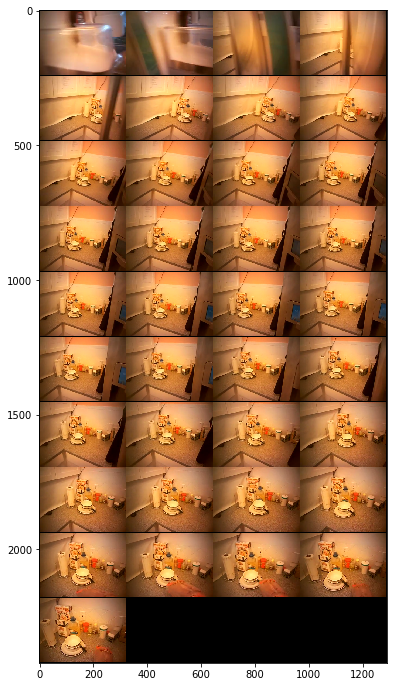

In [45]:
show(torchvision.utils.make_grid(torch.tensor(sv.transpose(0, 3, 1, 2)), nrow=4))

### Full Length Videos Dataset

In [124]:
MEAN = [0.485, 0.456, 0.406]
STD = [0.229, 0.224, 0.225]
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize(MEAN, STD)])
# transform = transforms.Compose([transforms.ToTensor()])

In [125]:
full_path = os.path.join(data_path, 'FullLengthVideos')

In [126]:
class FullLengthVideosDataset(Dataset):
    def __init__(self, video_path, video_label_path, test=False, sorting=False):
        self.video_path = video_path
        self.video_label_path = video_label_path
        
        self.datas = sorted(os.listdir(self.video_path))
        
        self.test = test
        self.sorting = sorting
    
    def __len__(self):
        return len(self.datas)
    
    def __getitem__(self):
        pass

In [127]:
with open(os.path.join(full_path, 'labels', 'train', 'OP02-R01-PastaSalad.txt'), 'r') as fin:
    tmp = fin.readlines()

In [128]:
len(tmp)

1085

In [129]:
datas = sorted(os.listdir(os.path.join(full_path, 'videos', 'train')))

In [130]:
datas[0]

'OP01-R01-PastaSalad'

In [134]:
rescale_factor = 0.5

In [135]:
images_path = sorted(glob.glob(os.path.join(full_path, 'videos', 'train', datas[0], '*')))

frames = []
for path in images_path, total=len(images_path)):
    frame = skimage.io.imread(path)
    frame = skimage.transform.rescale(frame, rescale_factor, mode='constant', preserve_range=True, multichannel=True, anti_aliasing=True).astype(np.uint8)
    frame = transform(frame)
    frames.append(frame)
frames = torch.stack(frames)

In [140]:
with open